In [ ]:
# 


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 

plt.style.use('ggplot')
import nltk



In [ ]:
df = pd.read_csv('Reviews.csv')

In [ ]:

df = df.head(1000)

In [ ]:
df["Text"].values[0]

In [ ]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title="Count reviews by stars", figsize=(15, 5))
ax.set_xlabel(" review stars")
ax

In [ ]:
exa = df["Text"][44]
exa

In [ ]:
tokens = nltk.word_tokenize(exa)
tokens[:11]


In [ ]:
# pos part of speech is for example cc means coordinating conjuction or NN means noun, singular(cat, tree)

#nltk.download('averaged_perceptron_tagger')

taged = nltk.pos_tag(tokens)
taged[:11]

In [ ]:


#nltk.download('maxent_ne_chunker')
#nltk.download('words')


entites = nltk.chunk.ne_chunk(taged)
entites.pprint()

In [ ]:
# VADER approach is a type of setiment analyses in nltk but it doesn't take into account the realation between words, which pretty important. it use bag of words method
# each word is is scored and combined to a total score
#nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
sia

In [ ]:
sia.polarity_scores("yes")

In [ ]:
# Running polarity score on our example
sia.polarity_scores(exa)

In [ ]:
# iterrows loops through rows of the df and provide both index and row.
# this function acess all the reviews in the data set then uses polarity score to find the sentiment analysis of each review of each review.

# If the columns are not in right oreder we can use reset_index and rename to make it right
#sentiment.reset_index().rename(columns={"index": "Id"})

result = []

for x, y in df.iterrows():
    data_t = y["Text"]
    x = sia.polarity_scores(data_t)
    result.append(x)
    sentiment = pd.DataFrame(result)
    
    
    

In [ ]:

# Adding the analysis dataframe to the table
new_data = pd.merge(df, sentiment, left_index = True, right_index = True)

In [ ]:
new_data

In [ ]:
ax = sns.barplot(data=new_data, x='Score',y='compound')
ax.set_title("Score sentiment relation")
plt.show()

# more stars are closely related to more positive compound number.  

In [ ]:
f
# Positive, negative and neutral realtion vs score.
ig, axs = plt.subplots(1, 3, figsize = (15,5))
ax = sns.barplot(data=new_data, x="Score" , y="neg", ax = axs[0])
ax = sns.barplot(data=new_data, x="Score" , y="pos", ax = axs[1])
ax = sns.barplot(data=new_data, x="Score" , y="neu", ax = axs[2])
axs[0].set_title("negativ")
axs[1].set_title("pos")
axs[2].set_title("neu")
plt.show()


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax



In [ ]:
Mode = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Mode)
model = AutoModelForSequenceClassification.from_pretrained(Mode)

In [ ]:
# using the pretrained model to make a prediction on the example 

encoded_text = tokenizer(exa, return_tensors='pt') # pt stands for pytorch
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

scores_dict = {
    'model_r_negativ': scores[0],
    'model_r_neutral': scores[1],
    'model_r_positive': scores[2]
}

print(scores_dict)



In [ ]:
sia.polarity_scores(exa)

In [ ]:

# Creating a function for applying the roberta model
def sentiment_score(exam):
    encoded_text = tokenizer(exam, return_tensors='pt') # pt stands for pytorch
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'model_r_negativ': scores[0],
        'model_r_neutral': scores[1],
        'model_r_positive': scores[2]
    }
    

In [ ]:
# Applying the model on the whole dataset and storing the result in a dataframe 
res = []
try:
    for x, y in df.iterrows():
        data_t = y["Text"]
        x = sentiment_score(data_t)
        res.append(x)
        senti = pd.DataFrame(res)
except RuntimeError:
    print("Text is too long")
    

In [ ]:
senti
# model_roberta_res = pd.DataFrame(res)
# model_roberta_res

In [184]:

model_r_data = pd.merge(new_data, senti, left_index=True, right_index=True )
model_r_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,model_r_negativ,model_r_neutral,model_r_positive
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,B004X2KR36,A26M5O53PHZTKN,"Debs ""peanut""",0,0,5,1348185600,Taste great,These taste really good. I have been purchasin...,0.034,0.798,0.168,0.8303,0.003559,0.027855,0.968587
78,79,B004X2KR36,A2AB7M9UCNBVN7,sharonh4,0,0,3,1346976000,Order only in cold weather,"The taste was great, but the berries had melte...",0.000,0.763,0.237,0.7814,0.004849,0.052556,0.942595
79,80,B005R8JE8O,A3H1EQD2PBC085,jmc,0,0,5,1344902400,this is the best,"i know i cannot make tea this good. granted, ...",0.087,0.589,0.324,0.8636,0.626153,0.282115,0.091732
80,81,B0066DMI6Y,AB30HQTI5VOLR,Melinda Bishop,1,1,5,1325116800,Delicious!,This peppermint stick is delicious and fun to ...,0.000,0.723,0.277,0.9098,0.001572,0.006270,0.992158


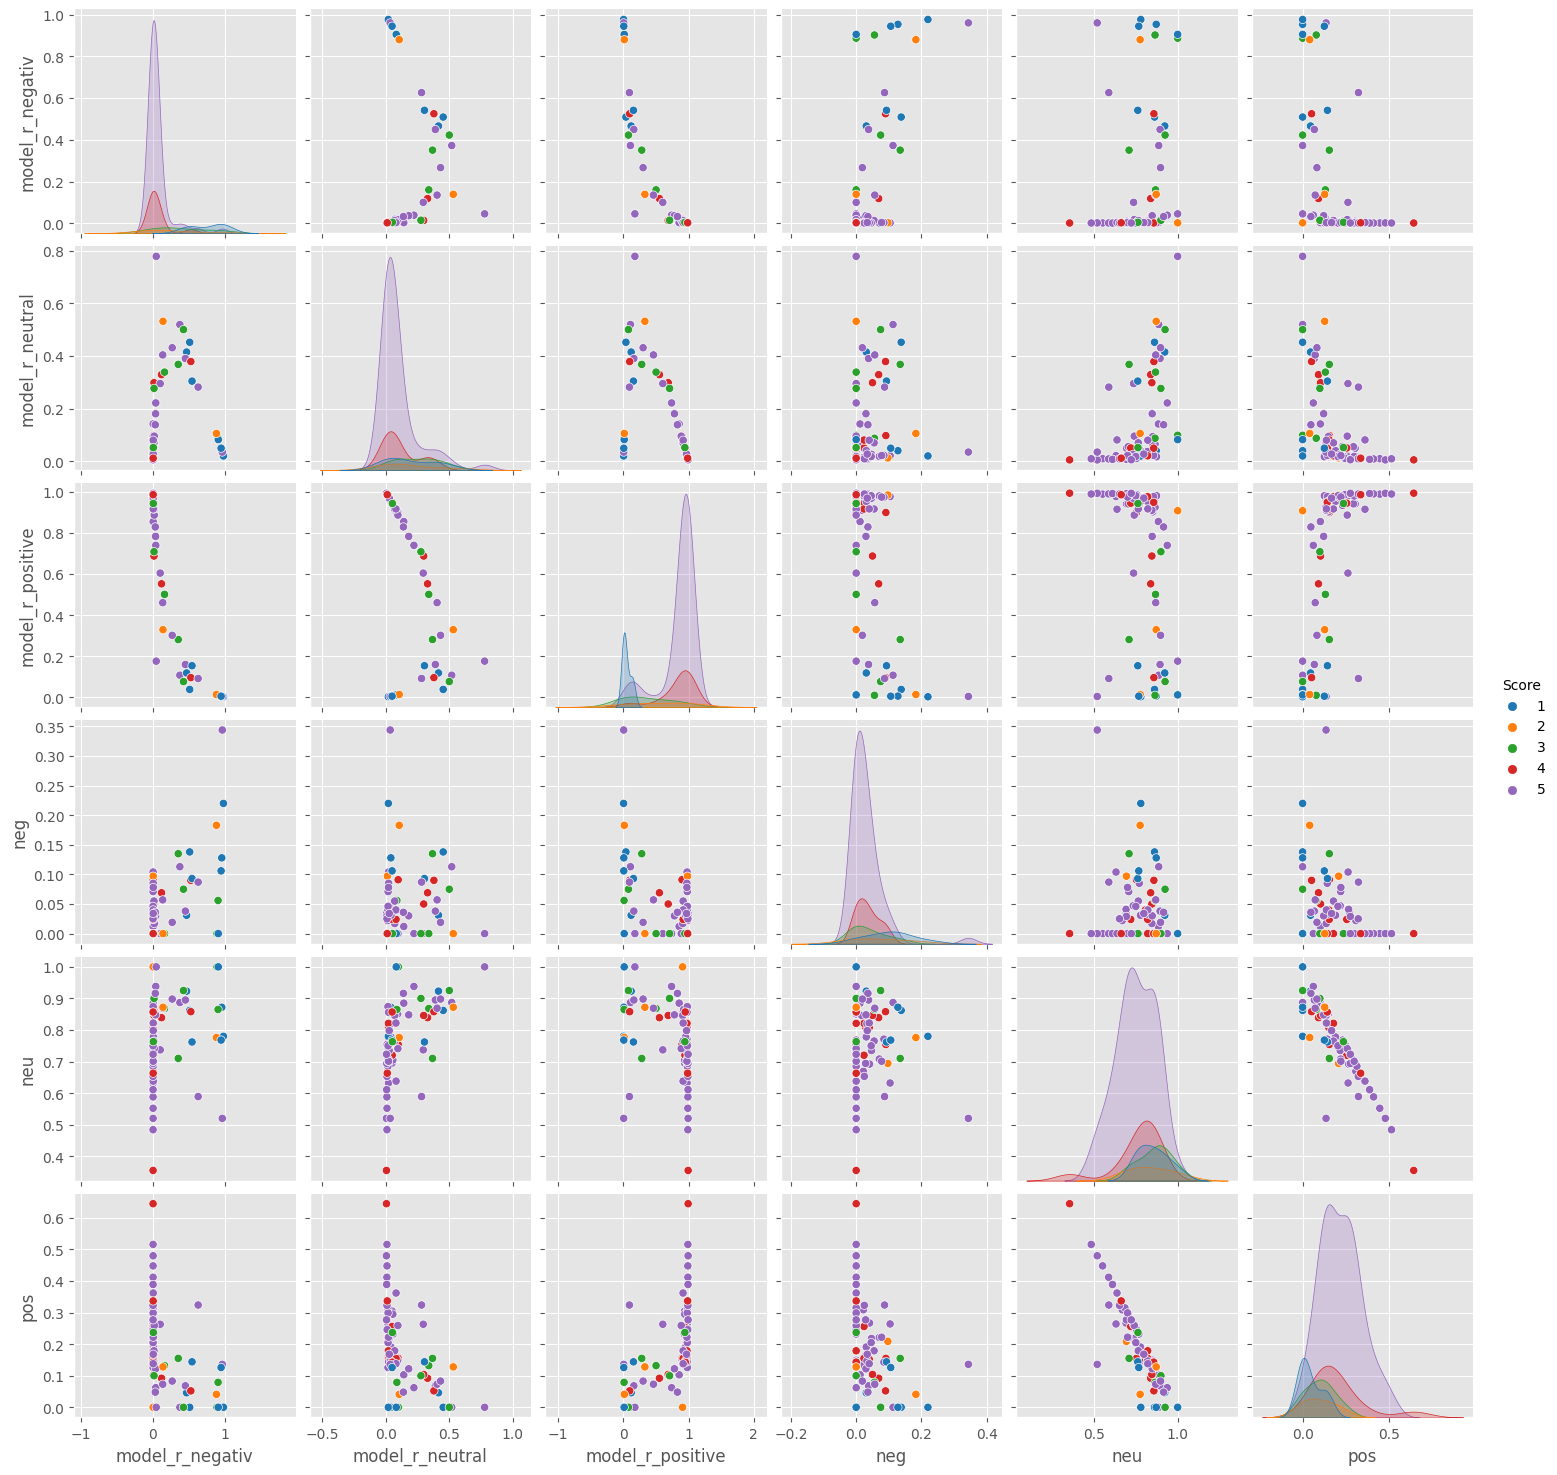

In [185]:
sns.pairplot(data=model_r_data,vars=['model_r_negativ','model_r_neutral','model_r_positive','neg','neu','pos'], hue='Score', palette='tab10')
plt.show()

In [188]:

# Here we take an example output where our model predicted positive but score is 1 .

model_r_data.query("Score == 1 ").sort_values("model_r_positive", ascending=False)['Text'].values[0]

'Buyer Beware Please! This sweetener is not for everybody.  Maltitol is an alcohol sugar and can be undigestible in the body.  You will know a short time after consuming it if you are one of the unsuspecting many who cannot digest it by the extreme intestinal bloating and cramping and massive amounts of gas a person can experience. Nausea, diarrhea & headaches can also be experienced. I learned my lesson the hard way years ago when I fell in love with the sugar-free chocolates suzanne sommers used to sell.  I thought I\'d found sugar-free chocolate nirvana at first taste but the bliss was short lived when the terrible side effects of maltitol kicked in.  The discomfort was unlike anything I had ever felt before.  I blew up like a balloon and had very painful abdominal cramping.  As the symptoms passed, this too was very unpleasant.  Though hard for me to believe a low calorie sweetener could be the culprit, all symptoms were gone when I stopped eating the chocolate. My hunch it had som

In [191]:

model_r_data.query("Score == 1 ").sort_values("pos", ascending=False)['Text'].values[3]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [193]:
# trying another example this time with score 5 and models prediction 
model_r_data.query("Score == 5 ").sort_values("model_r_negativ", ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [195]:
model_r_data.query("Score == 5 ").sort_values("neg", ascending=False)['Text'].values[3]

'i know i cannot make tea this good.  granted, i am not from the south but i know i have never enjoyed tea that was this sweet without being too sweet.  it tastes crisp.'